**Streamlit webapp for predicting:**

[![Streamlit App](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://share.streamlit.io/cego669/apartment-prices-goi-nia/main/webapp.py)

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

### Initial Approach

First of all, we must load the data and then take a look at it:

In [2]:
data = pd.read_csv("../input/apartments-prices-goinia/apartments_gyn.csv")
data.head()

,time,price,address,area,bedroom,bathroom,parking,characteristic,condominium
0,09/16/2021 11:46:53,R$ 1.580.000,"Setor Bueno, Goiânia - GO",230m²,3 quartos,6 banheiros 3 suítes,3 vagas,Piscina Varanda Área de serviço Quadra...,NaN
1,09/16/2021 11:46:57,R$ 450.000,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94m²,3 quartos,2 banheiros 1 suíte,1 vaga,Espaço gourmet Churrasqueira Playground ...,R$ 380
2,09/16/2021 11:47:01,R$ 330.000,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111m²,3 quartos,3 banheiros 1 suíte,1 vaga,Varanda Aceita animais Área de serviço ...,R$ 450
3,09/16/2021 11:47:04,R$ 320.000,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79m²,3 quartos,3 banheiros 3 suítes,1 vaga,Piscina Churrasqueira Elevador Condomí...,R$ 400
4,09/16/2021 11:47:08,R$ 915.525,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137m²,3 quartos,5 banheiros 3 suítes,2 vagas,Piscina Churrasqueira Elevador Condomí...,NaN


The "time" column is not useful here. I will drop it:

In [3]:
data = data.drop("time", axis = 1)
data.head()

,price,address,area,bedroom,bathroom,parking,characteristic,condominium
0,R$ 1.580.000,"Setor Bueno, Goiânia - GO",230m²,3 quartos,6 banheiros 3 suítes,3 vagas,Piscina Varanda Área de serviço Quadra...,NaN
1,R$ 450.000,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94m²,3 quartos,2 banheiros 1 suíte,1 vaga,Espaço gourmet Churrasqueira Playground ...,R$ 380
2,R$ 330.000,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111m²,3 quartos,3 banheiros 1 suíte,1 vaga,Varanda Aceita animais Área de serviço ...,R$ 450
3,R$ 320.000,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79m²,3 quartos,3 banheiros 3 suítes,1 vaga,Piscina Churrasqueira Elevador Condomí...,R$ 400
4,R$ 915.525,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137m²,3 quartos,5 banheiros 3 suítes,2 vagas,Piscina Churrasqueira Elevador Condomí...,NaN


Seeing general information...

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3830 entries, 0 to 3829
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           3822 non-null   object
 1   address         3822 non-null   object
 2   area            3822 non-null   object
 3   bedroom         3822 non-null   object
 4   bathroom        3822 non-null   object
 5   parking         3822 non-null   object
 6   characteristic  3114 non-null   object
 7   condominium     2742 non-null   object
dtypes: object(8)
memory usage: 239.5+ KB


We can see that there is some "na"s in the price column. I will drop the rows that don't have a value for "price":

In [5]:
data = data.dropna(subset = ["price"]).reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           3822 non-null   object
 1   address         3822 non-null   object
 2   area            3822 non-null   object
 3   bedroom         3822 non-null   object
 4   bathroom        3822 non-null   object
 5   parking         3822 non-null   object
 6   characteristic  3107 non-null   object
 7   condominium     2742 non-null   object
dtypes: object(8)
memory usage: 239.0+ KB


An important thing that we must see now is if all the rows in the "price" column refer to money. One way to see that is to verify the presence of the characters "R$" in the column:

In [6]:
temp = data.price.apply(lambda string: string if "R$" in string else np.nan)
data[temp.isna()]

,price,address,area,bedroom,bathroom,parking,characteristic,condominium
341,Sob Consulta,"Rua 1141, 337 - Setor Marista, Goiânia - GO",77m²,1 a 3 quartos,3 banheiros 2 suítes,1 vaga,NaN,NaN
378,Sob Consulta,"SOF Sul Quadra 7 - Zona Industrial, Brasília - DF",72 a 134m²,2 a 3 quartos,2 banheiros,1 vaga,NaN,NaN
913,Sob Consulta,"QI 29, LOTE 1 - Guara II, Brasília - DF",71m²,2 quartos,2 banheiros 1 suíte,1 até 2 vagas,NaN,NaN
1516,Sob Consulta,"SQSW 500 Bloco Q, 0 - Setor Sudoeste, Brasília...",346m²,4 quartos,6 banheiros 4 suítes,4 vagas,NaN,NaN
1528,Sob Consulta,"Rua 1141, S/N - Setor Marista, Goiânia - GO",190m²,3 quartos,5 banheiros 3 suítes,2 vagas,NaN,NaN
1779,Sob Consulta,"Rua 1141, S/N - Setor Marista, Goiânia - GO",352m²,4 quartos,6 banheiros 4 suítes,4 vagas,NaN,NaN
1899,Sob Consulta,"Rua 1141, S/N - Setor Marista, Goiânia - GO",348m²,4 quartos,6 banheiros 4 suítes,4 vagas,NaN,NaN
2234,Sob Consulta,"Alameda Santa Luzia, S/N - Mansoes Centro Oest...",40 a 72m²,2 quartos,1 banheiro,1 vaga,NaN,NaN
2416,Sob Consulta,"Rua 1141, S/N - Setor Marista, Goiânia - GO",172m²,3 quartos,4 banheiros 3 suítes,2 vagas,NaN,NaN
2496,Sob Consulta,"Rua Primeiro de Março, 06A - Vila Luciana, Goi...",49 a 51m²,2 quartos,2 banheiros 1 suíte,1 até 2 vagas,NaN,NaN


We can see that there are rows in the price column with values equal to "Sob Consulta", which in english means "On request". I will drop these rows, as I can't predict what values should be given to them:

In [7]:
data.price = data.price.apply(lambda string: string if "R$" in string else np.nan)
data = data.dropna(subset = ["price"]).reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3807 entries, 0 to 3806
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           3807 non-null   object
 1   address         3807 non-null   object
 2   area            3807 non-null   object
 3   bedroom         3807 non-null   object
 4   bathroom        3807 non-null   object
 5   parking         3807 non-null   object
 6   characteristic  3107 non-null   object
 7   condominium     2742 non-null   object
dtypes: object(8)
memory usage: 238.1+ KB


Now it is reasonable to verify if all the rows/apartments are from Goiània, Goiás. A simple way to do that is to test if there is rows that don't have "Goiânia" in the address column:

In [8]:
data[data.address.apply(lambda address: False if "Goiânia" in address else True)].address

280         Avenida Planalto - Vila Jayara, Anápolis - GO
392     Quadra 101 Conjunto 3, s/n - Samambaia Sul, Sa...
393      SQNW 102 Bloco I - Setor Noroeste, Brasília - DF
476                                       Aragoiânia - GO
496     Avenida Planalto - Vila Jaiara Setor Norte, An...
568     SQNW 106 Bloco F, S/N - Setor Noroeste, Brasíl...
670            SQN 114 Bloco C - Asa Norte, Brasília - DF
923     Avenida Augusto César Miranda Alencar, 31 - Ju...
1302     SQNW 310 Bloco D - Setor Noroeste, Brasília - DF
1361    Quadra 79 Conjunto A, 0 - Parque da Barragem S...
1467     SQNW 302 Bloco A - Setor Noroeste, Brasília - DF
1756     SQNW 311 Bloco H - Setor Noroeste, Brasília - DF
1821    Quadra QB 8, Lote 08 - MANSOES POR DO SOL, Águ...
2131                SGCV - Zona Industrial, Brasília - DF
2195    Quadra QC 06, s/n - Cidade Jardins, Valparaíso...
2235    QNN 30 Área Especial B - Ceilândia Sul, Ceilân...
2416     SQNW 302 Bloco D - Setor Noroeste, Brasília - DF
2451     SQNW 

As we can see, there is apartments from Anápolis and Brasília. This is not of my interest, as I want to predict the price of apartments that are from Goiânia, Goiás:

In [9]:
data.address = data.address.apply(lambda address: address if "Goiânia" in address else np.nan)
data = data.dropna(subset = ["address"]).reset_index(drop = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           3781 non-null   object
 1   address         3781 non-null   object
 2   area            3781 non-null   object
 3   bedroom         3781 non-null   object
 4   bathroom        3781 non-null   object
 5   parking         3781 non-null   object
 6   characteristic  3105 non-null   object
 7   condominium     2742 non-null   object
dtypes: object(8)
memory usage: 236.4+ KB


### Cleaning Data For Each Column

Let's start with the "price" column. The problem with it is that there are "R$" characters, and I need that the column to be numeric:

In [10]:
price_corrected = data.price.apply(lambda price: price.replace("R$ ", "").replace(".", ""))
data.price = pd.to_numeric(price_corrected).astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3781 entries, 0 to 3780
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           3781 non-null   float64
 1   address         3781 non-null   object 
 2   area            3781 non-null   object 
 3   bedroom         3781 non-null   object 
 4   bathroom        3781 non-null   object 
 5   parking         3781 non-null   object 
 6   characteristic  3105 non-null   object 
 7   condominium     2742 non-null   object 
dtypes: float64(1), object(7)
memory usage: 236.4+ KB


Similarly, I need the "area" column to be numeric. But note that some rows have values like "X a Ym²". Take a look:

In [11]:
data[data.area.apply(lambda area: True if "a" in area else False)]

,price,address,area,bedroom,bathroom,parking,characteristic,condominium
48,270500.0,"Rua T 37, 3449 - Setor Bueno, Goiânia - GO",39 a 88m²,1 a 3 quartos,1 a 3 banheiros até 3 suítes),Não informado Solicitar,NaN,NaN
49,274500.0,Avenida Armando de Godoy - Setor Negrão de Lim...,64 a 90m²,2 a 3 quartos,2 a 3 banheiros até 3 suítes),1 até 2 vagas,NaN,NaN
69,1028256.0,"Rua 135, 442 - Setor Marista, Goiânia - GO",170 a 199m²,3 a 4 quartos,1 banheiro até 4 suítes),1 vaga,NaN,NaN
101,513000.0,"Rua C228, Quadra 535 - Jardim América, Goiânia...",66 a 90m²,3 quartos,1 banheiro 1 suíte,1 vaga,NaN,NaN
475,159490.0,"Avenida Maria de Melo, lote 01 - Zona Industri...",39 a 42m²,2 quartos,1 banheiro,1 vaga,NaN,NaN
591,2000000.0,"Rua 146, 500 - Setor Marista, Goiânia - GO",267 a 504m²,4 a 5 quartos,1 a 2 banheiros até 4 suítes),1 vaga,NaN,NaN
695,2470259.0,"Rua 38, 0 - Setor Marista, Goiânia - GO",326 a 367m²,3 a 4 quartos,3 a 5 banheiros até 5 suítes),4 até 5 vagas,NaN,NaN
728,430000.0,"Rua R 7, Qd. E3, Lote 44-46 - Setor Oeste, Goi...",66 a 68m²,2 quartos,2 a 3 banheiros 2 suítes,2 vagas,NaN,NaN
926,146490.0,"Avenida São Domingos, 0 - Vila Mutirão I, Goiâ...",39 a 42m²,2 quartos,1 banheiro,1 vaga,NaN,NaN
1098,570472.0,"Rua 137, - - Setor Marista, Goiânia - GO",83 a 89m²,1 a 3 quartos,2 a 3 banheiros até 2 suítes),1 até 2 vagas,NaN,NaN


In the vivareal website, some apartments weren't launched yet, and the price collected by my script took the "minimal value", so to speak.

Apartments that weren't launched also had a range for the other columns. So I must take the minimal value for all of them, and of course to guarantee that the values are numeric.

Correcting the "area" column:

In [12]:
area_corrected = data.area.apply(lambda area: area.split(" a ")[0] if "a" in area else area.replace("m²", ""))
data.area = pd.to_numeric(area_corrected).astype("float")
data.head()

,price,address,area,bedroom,bathroom,parking,characteristic,condominium
0,1580000.0,"Setor Bueno, Goiânia - GO",230.0,3 quartos,6 banheiros 3 suítes,3 vagas,Piscina Varanda Área de serviço Quadra...,NaN
1,450000.0,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94.0,3 quartos,2 banheiros 1 suíte,1 vaga,Espaço gourmet Churrasqueira Playground ...,R$ 380
2,330000.0,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111.0,3 quartos,3 banheiros 1 suíte,1 vaga,Varanda Aceita animais Área de serviço ...,R$ 450
3,320000.0,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79.0,3 quartos,3 banheiros 3 suítes,1 vaga,Piscina Churrasqueira Elevador Condomí...,R$ 400
4,915525.0,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137.0,3 quartos,5 banheiros 3 suítes,2 vagas,Piscina Churrasqueira Elevador Condomí...,NaN


Now see that there is one row in the "bedroom" column that don't have information about the number of bedrooms in the apartment:

In [13]:
data[data.bedroom.apply(lambda bedroom: True if "Solicitar" in bedroom else False)]

,price,address,area,bedroom,bathroom,parking,characteristic,condominium
846,200000.0,"Avenida E - Jardim Goiás, Goiânia - GO",5000.0,Não informado Solicitar,Não informado Solicitar,2 vagas,NaN,R$ 1


Also note that the informations to that "apartment" are very weird. What apartment have 5000m²? That's simply surreal.

I will not think much about it and just drop the row:

In [14]:
data = data.drop(846).reset_index(drop = True)
data[data.bedroom.apply(lambda bedroom: True if "Solicitar" in bedroom else False)]

,price,address,area,bedroom,bathroom,parking,characteristic,condominium


Nice.

Now I can take the minimal value for the rows that have a range, and then transform the rows to a numeric value:

In [15]:
data.bedroom = data.bedroom.apply(lambda bedroom: bedroom.split(" a ")[0] if " a " in bedroom else bedroom.split("quarto")[0])
data.bedroom = pd.to_numeric(data.bedroom)
data.head()

,price,address,area,bedroom,bathroom,parking,characteristic,condominium
0,1580000.0,"Setor Bueno, Goiânia - GO",230.0,3,6 banheiros 3 suítes,3 vagas,Piscina Varanda Área de serviço Quadra...,NaN
1,450000.0,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94.0,3,2 banheiros 1 suíte,1 vaga,Espaço gourmet Churrasqueira Playground ...,R$ 380
2,330000.0,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111.0,3,3 banheiros 1 suíte,1 vaga,Varanda Aceita animais Área de serviço ...,R$ 450
3,320000.0,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79.0,3,3 banheiros 3 suítes,1 vaga,Piscina Churrasqueira Elevador Condomí...,R$ 400
4,915525.0,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137.0,3,5 banheiros 3 suítes,2 vagas,Piscina Churrasqueira Elevador Condomí...,NaN


The bathroom column will give some work to us...

Note that there is two informations in this column: number of bathrooms and number of suites (if it exists). So I will try to separate these informations in two distinct columns.

First I will get rid of some unnecessary white spaces and then replace some strings:

In [16]:
data.bathroom = data.bathroom.apply(lambda string: ' '.join(string.split()).
                    replace("banheiros", "banheiro").replace("suítes", "suíte"))
data.bathroom.unique()

array(['6 banheiro 3 suíte', '2 banheiro 1 suíte', '3 banheiro 1 suíte',
       '3 banheiro 3 suíte', '5 banheiro 3 suíte', '5 banheiro 2 suíte',
       '5 banheiro 4 suíte', '1 banheiro', '4 banheiro 4 suíte',
       '6 banheiro 4 suíte', '1 banheiro 1 suíte', '4 banheiro 3 suíte',
       '3 banheiro 2 suíte', '7 banheiro 4 suíte',
       '1 a 3 banheiro até 3 suíte)', '2 a 3 banheiro até 3 suíte)',
       '6 banheiro 6 suíte', '2 banheiro', '1 banheiro até 4 suíte)',
       '4 banheiro 1 suíte', '2 banheiro 2 suíte', '4 banheiro 2 suíte',
       '8 banheiro 5 suíte', '1 banheiro 3 suíte', '1 banheiro 2 suíte',
       '1 banheiro 4 suíte', '7 banheiro 5 suíte', '6 banheiro 5 suíte',
       '2 banheiro 6 suíte', '2 banheiro 3 suíte', '5 banheiro',
       '11 banheiro 4 suíte', '5 banheiro 5 suíte', '4 banheiro',
       '6 banheiro 2 suíte', '1 banheiro 5 suíte', '4 banheiro 30 suíte',
       '7 banheiro 6 suíte', '1 a 2 banheiro até 4 suíte)',
       '3 a 5 banheiro até 5 suíte)', '2 a

Note the pattern that I explained.

Note also that not all apartments have suite:

It's easy to take just the number of bathrooms:

In [17]:
bathroom = data.bathroom.apply(lambda string: string.split()[0])
bathroom.unique()

array(['6', '2', '3', '5', '1', '4', '7', '8', '11', '9'], dtype=object)

Now I must try to catch only the number of suites. I will start by separating the informations:

In [18]:
suite = data.bathroom.apply(lambda string: string.split("banheiro ")[-1])
suite.unique()

array(['3 suíte', '1 suíte', '2 suíte', '4 suíte', '1 banheiro',
       'até 3 suíte)', '6 suíte', '2 banheiro', 'até 4 suíte)', '5 suíte',
       '5 banheiro', '4 banheiro', '30 suíte', 'até 5 suíte)',
       'até 2 suíte)', '3 banheiro', '7 suíte', '6 banheiro',
       'até 1 suíte)', '7 banheiro'], dtype=object)

Now it's useful to create a temporary function to take only the number of suites, if it exists:

In [19]:
def temp_func(string):
    if "banheiro" in string:
        return 0
    elif "até" not in string:
        return string.split()[0]
    else:
        return np.nan

In [20]:
suite = suite.apply(temp_func)
suite.unique()

array(['3', '1', '2', '4', 0, nan, '6', '5', '30', '7'], dtype=object)

It seems okay (except for the 30 there, but let's forget about it for now).

Now let's update the columns in data:

In [21]:
data["suite"] = pd.to_numeric(suite)
data

,price,address,area,bedroom,bathroom,parking,characteristic,condominium,suite
0,1580000.0,"Setor Bueno, Goiânia - GO",230.0,3,6 banheiro 3 suíte,3 vagas,Piscina Varanda Área de serviço Quadra...,NaN,3.0
1,450000.0,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94.0,3,2 banheiro 1 suíte,1 vaga,Espaço gourmet Churrasqueira Playground ...,R$ 380,1.0
2,330000.0,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111.0,3,3 banheiro 1 suíte,1 vaga,Varanda Aceita animais Área de serviço ...,R$ 450,1.0
3,320000.0,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79.0,3,3 banheiro 3 suíte,1 vaga,Piscina Churrasqueira Elevador Condomí...,R$ 400,3.0
4,915525.0,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137.0,3,5 banheiro 3 suíte,2 vagas,Piscina Churrasqueira Elevador Condomí...,NaN,3.0
...,...,...,...,...,...,...,...,...,...
3775,539000.0,"Avenida Olinda, 0 - Park Lozândes, Goiânia - GO",105.0,3,4 banheiro 3 suíte,2 vagas,Piscina Churrasqueira Elevador Condomí...,R$ 420,3.0
3776,279900.0,"Rua T 36, 3445 - Setor Bueno, Goiânia - GO",85.0,3,2 banheiro 1 suíte,1 vaga,Academia Aceita animais Salão de festas ...,R$ 400,1.0
3777,430000.0,"Setor Marista, Goiânia - GO",64.0,2,2 banheiro 1 suíte,2 vagas,NaN,NaN,1.0
3778,445000.0,"Rua 99, 26 - Setor Sul, Goiânia - GO",185.0,3,4 banheiro 2 suíte,2 vagas,Elevador Condomínio fechado Aceita anima...,R$ 1.000,2.0


In [22]:
data.bathroom = pd.to_numeric(bathroom)
data

,price,address,area,bedroom,bathroom,parking,characteristic,condominium,suite
0,1580000.0,"Setor Bueno, Goiânia - GO",230.0,3,6,3 vagas,Piscina Varanda Área de serviço Quadra...,NaN,3.0
1,450000.0,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94.0,3,2,1 vaga,Espaço gourmet Churrasqueira Playground ...,R$ 380,1.0
2,330000.0,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111.0,3,3,1 vaga,Varanda Aceita animais Área de serviço ...,R$ 450,1.0
3,320000.0,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79.0,3,3,1 vaga,Piscina Churrasqueira Elevador Condomí...,R$ 400,3.0
4,915525.0,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137.0,3,5,2 vagas,Piscina Churrasqueira Elevador Condomí...,NaN,3.0
...,...,...,...,...,...,...,...,...,...
3775,539000.0,"Avenida Olinda, 0 - Park Lozândes, Goiânia - GO",105.0,3,4,2 vagas,Piscina Churrasqueira Elevador Condomí...,R$ 420,3.0
3776,279900.0,"Rua T 36, 3445 - Setor Bueno, Goiânia - GO",85.0,3,2,1 vaga,Academia Aceita animais Salão de festas ...,R$ 400,1.0
3777,430000.0,"Setor Marista, Goiânia - GO",64.0,2,2,2 vagas,NaN,NaN,1.0
3778,445000.0,"Rua 99, 26 - Setor Sul, Goiânia - GO",185.0,3,4,2 vagas,Elevador Condomínio fechado Aceita anima...,R$ 1.000,2.0


Focusing in the "parking" column, we can apply the same things that we've already discussed:

In [23]:
data.parking.unique()

array(['  3 vagas  ', '  1 vaga  ', '  2 vagas  ',
       '  Não informado Solicitar ', '  4 vagas  ', '  5 vagas  ',
       '  1 até 2 vagas  ', '  10 vagas  ', '  6 vagas  ', '  27 vagas  ',
       '  9 vagas  ', '  4 até 5 vagas  ', '  19 vagas  ', '  30 vagas  ',
       '  12 vagas  ', '  7 vagas  ', '  20 vagas  ', '  16 vagas  ',
       '  2 até 3 vagas  ', '  1 até 3 vagas  ', '  3 até 5 vagas  ',
       '  3 até 4 vagas  '], dtype=object)

In [24]:
def temp_func(string):
    if "Solicitar" in string:
        return np.nan
    elif "até" in string:
        return string.split("até")[0]
    else:
        return string.split()[0]

In [25]:
parking = data.parking.apply(temp_func)
parking.unique()

array(['3', '1', '2', nan, '4', '5', '  1 ', '10', '6', '27', '9', '  4 ',
       '19', '30', '12', '7', '20', '16', '  2 ', '  3 '], dtype=object)

In [26]:
data.parking = pd.to_numeric(parking)
data

,price,address,area,bedroom,bathroom,parking,characteristic,condominium,suite
0,1580000.0,"Setor Bueno, Goiânia - GO",230.0,3,6,3.0,Piscina Varanda Área de serviço Quadra...,NaN,3.0
1,450000.0,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94.0,3,2,1.0,Espaço gourmet Churrasqueira Playground ...,R$ 380,1.0
2,330000.0,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111.0,3,3,1.0,Varanda Aceita animais Área de serviço ...,R$ 450,1.0
3,320000.0,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79.0,3,3,1.0,Piscina Churrasqueira Elevador Condomí...,R$ 400,3.0
4,915525.0,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137.0,3,5,2.0,Piscina Churrasqueira Elevador Condomí...,NaN,3.0
...,...,...,...,...,...,...,...,...,...
3775,539000.0,"Avenida Olinda, 0 - Park Lozândes, Goiânia - GO",105.0,3,4,2.0,Piscina Churrasqueira Elevador Condomí...,R$ 420,3.0
3776,279900.0,"Rua T 36, 3445 - Setor Bueno, Goiânia - GO",85.0,3,2,1.0,Academia Aceita animais Salão de festas ...,R$ 400,1.0
3777,430000.0,"Setor Marista, Goiânia - GO",64.0,2,2,2.0,NaN,NaN,1.0
3778,445000.0,"Rua 99, 26 - Setor Sul, Goiânia - GO",185.0,3,4,2.0,Elevador Condomínio fechado Aceita anima...,R$ 1.000,2.0


The way I will deal with the characteristic column is kind of different.

I want to create one column for each characteristic, so we can use these informations for predicting. But before that, let's see how many na values we have in this column:

In [27]:
pd.isna(data.characteristic).sum()

675

The first thing I think seeing this number is: can I simply drop these rows?

The answer is: maybe. Can I have a way to treat these na values? No, I don't. Note that "I don't", but maybe you can.

Dropping these rows, I have:

In [28]:
data = data.dropna(subset = ["characteristic"]).reset_index(drop = True)

Now I will put some underlines to separate each characteristic:

In [29]:
data.characteristic = data.characteristic.apply(lambda string: string.strip().
                                                replace(" ", "_").replace("___", " ").replace("-", "_").
                                               replace("_/_", "_"))
data

,price,address,area,bedroom,bathroom,parking,characteristic,condominium,suite
0,1580000.0,"Setor Bueno, Goiânia - GO",230.0,3,6,3.0,Piscina Varanda Área_de_serviço Quadra_poliesp...,NaN,3.0
1,450000.0,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94.0,3,2,1.0,Espaço_gourmet Churrasqueira Playground Piscin...,R$ 380,1.0
2,330000.0,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111.0,3,3,1.0,Varanda Aceita_animais Área_de_serviço Salão_d...,R$ 450,1.0
3,320000.0,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79.0,3,3,1.0,Piscina Churrasqueira Elevador Condomínio_fech...,R$ 400,3.0
4,915525.0,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137.0,3,5,2.0,Piscina Churrasqueira Elevador Condomínio_fech...,NaN,3.0
...,...,...,...,...,...,...,...,...,...
3100,1100000.0,"Avenida T 5, 901 - Setor Bueno, Goiânia - GO",240.0,4,6,4.0,Piscina Churrasqueira Elevador Condomínio_fech...,R$ 1.300,4.0
3101,539000.0,"Avenida Olinda, 0 - Park Lozândes, Goiânia - GO",105.0,3,4,2.0,Piscina Churrasqueira Elevador Condomínio_fech...,R$ 420,3.0
3102,279900.0,"Rua T 36, 3445 - Setor Bueno, Goiânia - GO",85.0,3,2,1.0,Academia Aceita_animais Salão_de_festas Condom...,R$ 400,1.0
3103,445000.0,"Rua 99, 26 - Setor Sul, Goiânia - GO",185.0,3,4,2.0,Elevador Condomínio_fechado Aceita_animais Ar_...,R$ 1.000,2.0


In [30]:
data.characteristic.unique()

array(['Piscina Varanda Área_de_serviço Quadra_poliesportiva Escritório Armário_na_cozinha Interfone TV_a_cabo Mais_de_um_andar Sauna',
       'Espaço_gourmet Churrasqueira Playground Piscina Portaria_24h',
       'Varanda Aceita_animais Área_de_serviço Salão_de_festas Guarita Armário_embutido Armário_embutido_no_quarto Armário_na_cozinha Armário_no_banheiro Banheiro_de_serviço Closet Depósito Interfone Dependência_de_empregados',
       ...,
       'Piscina Churrasqueira Elevador Condomínio_fechado Academia Aceita_animais Espaço_gourmet Ar_condicionado Jardim Área_de_serviço Playground Varanda_gourmet Piscina_infantil Salão_de_festas Quadra_poliesportiva Portaria_24h Conexão_à_internet Interfone Sistema_de_alarme TV_a_cabo Circuito_de_segurança Piscina_para_adulto Sauna Portão_eletrônico',
       'Academia Aceita_animais Salão_de_festas Condomínio_fechado Elevador',
       'Piscina Churrasqueira Varanda Academia Espaço_gourmet Área_de_serviço Playground Salão_de_festas Portaria_24h Ba

To create a column for each characteristic, I need to use the CountVectorizer function, from sklearn. As the name of the function suggests, it returns the number of times a specific word appears in a text. But instead a text, I will give an entire oolumn to the function, and it will return to me a matrix where each column is a word and each row is the number of times each word appeared for each apartment.

I don't know if I was succesfull explaining this, but... Let's just continue:

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Generates count_vectorizer object
count_vectorizer = CountVectorizer()

# Generates a sparse matrix with the count of each word
characteristic_matrix = count_vectorizer.fit_transform(data.characteristic).toarray()
characteristic_df = pd.DataFrame(characteristic_matrix)
characteristic_df.columns = count_vectorizer.get_feature_names()

# Appends the matrix to data
data = pd.concat([data, characteristic_df], axis = 1)
data.head()

,price,address,area,bedroom,bathroom,parking,characteristic,condominium,suite,academia,...,vestiário_para_diaristas,vigia,vigilância,vista_exterior,vista_panorâmica,vista_para_a_montanha,vista_para_lago,área_de_lazer,área_de_serviço,árvore_frutífera
0,1580000.0,"Setor Bueno, Goiânia - GO",230.0,3,6,3.0,Piscina Varanda Área_de_serviço Quadra_poliesp...,NaN,3.0,0,...,0,0,0,0,0,0,0,0,1,0
1,450000.0,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94.0,3,2,1.0,Espaço_gourmet Churrasqueira Playground Piscin...,R$ 380,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,330000.0,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111.0,3,3,1.0,Varanda Aceita_animais Área_de_serviço Salão_d...,R$ 450,1.0,0,...,0,0,0,0,0,0,0,0,1,0
3,320000.0,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79.0,3,3,1.0,Piscina Churrasqueira Elevador Condomínio_fech...,R$ 400,3.0,1,...,0,0,0,0,0,0,0,0,0,0
4,915525.0,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137.0,3,5,2.0,Piscina Churrasqueira Elevador Condomínio_fech...,NaN,3.0,1,...,0,0,0,0,0,0,0,0,1,0


Observe the result. It makes sense for you? In this way, we can effectively use the characteristic column for regression.

How can I use the address column? It's useful for predicting? Of course it is! But not as the way it is. I will collect the list of districts for each region in Goiânia and then apply a function to the address column that will return to us the region of each apartment.

In this way we will have more useful information for predicting.

First I will collect the data:

In [32]:
import requests
from bs4 import BeautifulSoup

def getRgnsDict():
    
    # getting html text from wikipedia
    url = "https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Goi%C3%A2nia"
    html_text = requests.get(url).text
    
    # getting soup
    soup = BeautifulSoup(html_text, "lxml")
    
    # focusing on the table
    tb = soup.find("div", class_ = "mw-parser-output")
    
    # preparing to loop over each region name
    nms_rgns = []
    tag_rgns = tb.find_all("h2")
    for tag in tag_rgns:
        try:
            nms_rgns.append(tag.find("span", class_ = "mw-headline").text)
        except:
            continue
    
    # preparing to loop over each region districts
    tag_dtc = tb.find_all("ol")
    rgns_dict = {}
    for i, tag in enumerate(tag_dtc):
        districts = tag.find_all("li")
        # preparing to append each district
        temp = []
        for district in districts:
            temp.append(district.text.replace("  ", " "))
        # saving district list to a dictionary with corresponding region key
        rgns_dict[nms_rgns[i]] = temp
    
    # deleting 'reference' key
    del rgns_dict[nms_rgns[-1]]
    
    return rgns_dict

In [33]:
rgns_dict = getRgnsDict()

Note the pattern in the address column...

In [34]:
data.address

0                               Setor Bueno, Goiânia - GO
1            Rua Natal, 59 - Alto da Glória, Goiânia - GO
2          Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO
3       Avenida Nápoli, 201 - Residencial Eldorado, Go...
4                 Rua T 36, 1 - Setor Bueno, Goiânia - GO
                              ...                        
3100         Avenida T 5, 901 - Setor Bueno, Goiânia - GO
3101      Avenida Olinda, 0 - Park Lozândes, Goiânia - GO
3102           Rua T 36, 3445 - Setor Bueno, Goiânia - GO
3103                 Rua 99, 26 - Setor Sul, Goiânia - GO
3104               Rua 1141 - Setor Marista, Goiânia - GO
Name: address, Length: 3105, dtype: object

The district is in the middle. So I must create a function that takes this in consideration:

In [35]:
def getRgn(address):
    
    address_district = address.split("-")[-2].split(",")[0].replace("Suica", "Suíça")\
    .replace("Suiça", "Suíça").replace("Goiania", "Goiânia").replace("Lozândes", "Lozandes")\
    .replace("Itaipu", "Itaipú").replace("Vila dos Alpes", "Vila Alpes")\
    .replace("Parque Joao Braz Cidade Industrial", "Parque Industrial João Braz")\
    .replace("Chacaras Botafogo", "Chácara Botafogo").replace("Areiao", "Areião")\
    .replace("Itamaraca", "Itamaracá")
    
    for region in rgns_dict.keys():
        for district in rgns_dict[region]:
            
            district = district.replace("Esperanca", "Esperança").replace("Faicalville", "Faiçalville")\
            .replace("Vila Froes", "Vila Fróes")
            
            if district in address_district or address_district in district:
                return region
    return np.nan

In [36]:
pd.isna(data.address.apply(getRgn)).sum()

17

All these "replace"s inside the function were created iteratively, trying to minimize the number of resultant na's. Of course it can't be perfect...

Now I will create a column just for the region of each apartment and drop the rows with no region:

In [37]:
data["region"] = data.address.apply(getRgn)
data = data.dropna(subset = ["region"]).reset_index(drop = True)
data

,price,address,area,bedroom,bathroom,parking,characteristic,condominium,suite,academia,...,vigia,vigilância,vista_exterior,vista_panorâmica,vista_para_a_montanha,vista_para_lago,área_de_lazer,área_de_serviço,árvore_frutífera,region
0,1580000.0,"Setor Bueno, Goiânia - GO",230.0,3,6,3.0,Piscina Varanda Área_de_serviço Quadra_poliesp...,NaN,3.0,0,...,0,0,0,0,0,0,0,1,0,Sul
1,450000.0,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94.0,3,2,1.0,Espaço_gourmet Churrasqueira Playground Piscin...,R$ 380,1.0,0,...,0,0,0,0,0,0,0,0,0,Sul
2,330000.0,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111.0,3,3,1.0,Varanda Aceita_animais Área_de_serviço Salão_d...,R$ 450,1.0,0,...,0,0,0,0,0,0,0,1,0,Sul
3,320000.0,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79.0,3,3,1.0,Piscina Churrasqueira Elevador Condomínio_fech...,R$ 400,3.0,1,...,0,0,0,0,0,0,0,0,0,Sudoeste
4,915525.0,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137.0,3,5,2.0,Piscina Churrasqueira Elevador Condomínio_fech...,NaN,3.0,1,...,0,0,0,0,0,0,0,1,0,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,1100000.0,"Avenida T 5, 901 - Setor Bueno, Goiânia - GO",240.0,4,6,4.0,Piscina Churrasqueira Elevador Condomínio_fech...,R$ 1.300,4.0,0,...,1,0,0,0,0,0,1,1,0,Sul
3084,539000.0,"Avenida Olinda, 0 - Park Lozândes, Goiânia - GO",105.0,3,4,2.0,Piscina Churrasqueira Elevador Condomínio_fech...,R$ 420,3.0,1,...,0,0,0,0,0,0,0,1,0,Leste
3085,279900.0,"Rua T 36, 3445 - Setor Bueno, Goiânia - GO",85.0,3,2,1.0,Academia Aceita_animais Salão_de_festas Condom...,R$ 400,1.0,1,...,0,0,0,0,0,0,0,0,0,Sul
3086,445000.0,"Rua 99, 26 - Setor Sul, Goiânia - GO",185.0,3,4,2.0,Elevador Condomínio_fechado Aceita_animais Ar_...,R$ 1.000,2.0,0,...,0,0,0,0,0,0,0,0,0,Centro Oeste


Lastly, let's correct the "condominium" column, as we corrected the "price" column:

In [38]:
def temp_func(string):
    try:
        return string.replace("R$", "").replace(".", "")
    except:
        return np.nan

In [39]:
condominium = data.condominium.apply(temp_func)
condominium

0           NaN
1          380 
2          450 
3          400 
4           NaN
         ...   
3083      1300 
3084       420 
3085       400 
3086      1000 
3087        NaN
Name: condominium, Length: 3088, dtype: object

In [40]:
data.condominium = pd.to_numeric(data.condominium.apply(temp_func))
data.head()

,price,address,area,bedroom,bathroom,parking,characteristic,condominium,suite,academia,...,vigia,vigilância,vista_exterior,vista_panorâmica,vista_para_a_montanha,vista_para_lago,área_de_lazer,área_de_serviço,árvore_frutífera,region
0,1580000.0,"Setor Bueno, Goiânia - GO",230.0,3,6,3.0,Piscina Varanda Área_de_serviço Quadra_poliesp...,NaN,3.0,0,...,0,0,0,0,0,0,0,1,0,Sul
1,450000.0,"Rua Natal, 59 - Alto da Glória, Goiânia - GO",94.0,3,2,1.0,Espaço_gourmet Churrasqueira Playground Piscin...,380.0,1.0,0,...,0,0,0,0,0,0,0,0,0,Sul
2,330000.0,"Rua Dom Orione, 57 - Setor Oeste, Goiânia - GO",111.0,3,3,1.0,Varanda Aceita_animais Área_de_serviço Salão_d...,450.0,1.0,0,...,0,0,0,0,0,0,0,1,0,Sul
3,320000.0,"Avenida Nápoli, 201 - Residencial Eldorado, Go...",79.0,3,3,1.0,Piscina Churrasqueira Elevador Condomínio_fech...,400.0,3.0,1,...,0,0,0,0,0,0,0,0,0,Sudoeste
4,915525.0,"Rua T 36, 1 - Setor Bueno, Goiânia - GO",137.0,3,5,2.0,Piscina Churrasqueira Elevador Condomínio_fech...,NaN,3.0,1,...,0,0,0,0,0,0,0,1,0,Sul


Now we are ready for exploration!! :)

***

# Data Exploration

First I will run some cells that will facilitate my life.

These cells contain functions that give me control over some useful plots:

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [42]:
# boxplot
def boxplot(data, x, y, ylim = None, figsize = None, rotation = None):
    if figsize != None:
        fig = plt.figure(figsize = figsize)
    sns.boxplot(data = data, x = x, y = y)
    if ylim != None:
        plt.ylim(ylim)
    if rotation != None:
        plt.xticks(rotation = rotation)
    plt.show()

In [43]:
# scatter plot
def scatterplot(data, x, y, figsize = None, xlim = None, ylim = None):
    if figsize != None:
        fig = plt.figure(figsize = figsize)
    sns.scatterplot(data = data, x = x, y = y)
    if xlim != None:
        plt.xlim(xlim)
    if ylim != None:
        plt.ylim(ylim)
    plt.show()

What's my intention? To create a linear model capable of predict the price of apartments in Goiânia based on some features.

So I need to explore which features are important and how they relate to the price of the apartments (because maybe it's non-linear and it needs some transformation, for example).

Let's begin by relating area and price:

### Price x area

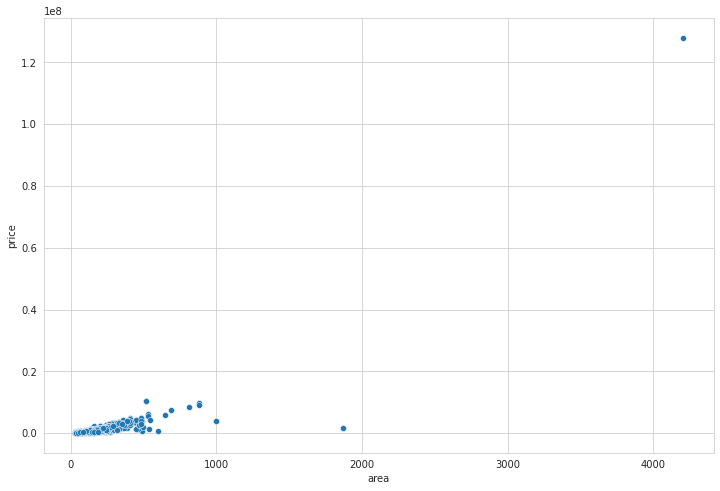

In [44]:
scatterplot(data, "area", "price", (12, 8))

Well... There is some weird apartments here... It is possible to an apartment to have more than 1000m²? Okay, it can be. But how can I have certainty about that just with the data that I have?

I will not think twice and just delete these apartments and then plot the scatter plot again. They don't make sense for me:

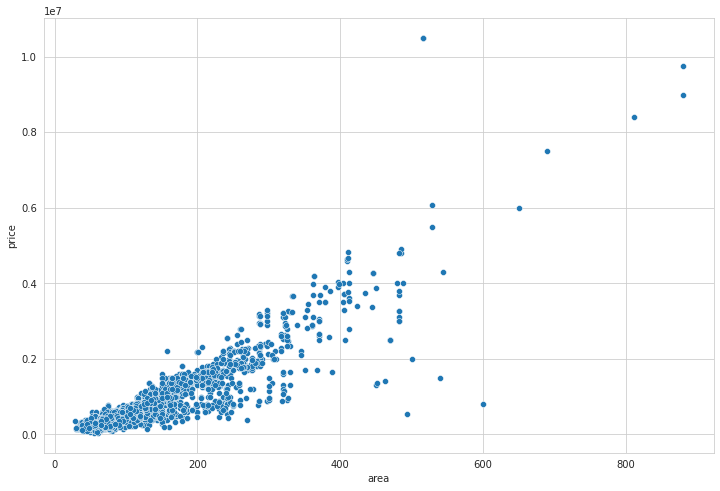

In [45]:
data = data[data.area < 1000].reset_index(drop = True)
scatterplot(data, "area", "price", (12, 8))

Note that the behaviour of the points is not linear... It seems to me like a quadratic curve. So if I do a square root transformation over price, maybe we could have a more linear curve. Let's try:

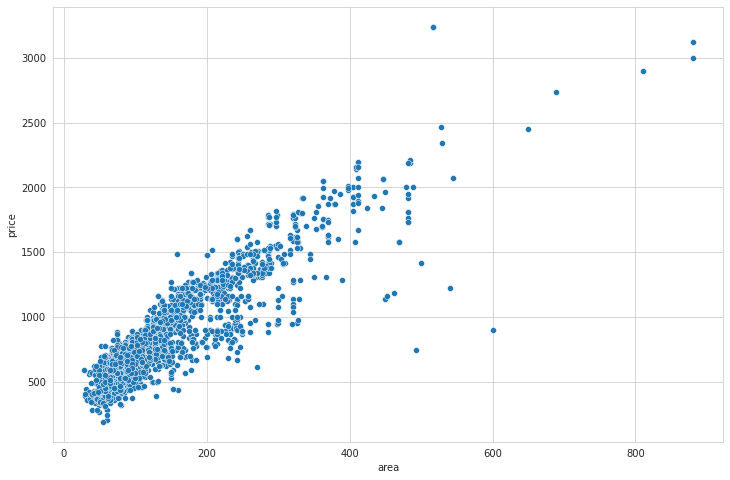

In [46]:
temp_data = data.copy()
temp_data.price = np.sqrt(temp_data.price)
scatterplot(temp_data, "area", "price", (12, 8))

There it is... It is more linear. So price probably is related to the area squared (price ~ area²).

### Price x bedroom

For Price x Bedroom, I think that a boxplot will be useful:

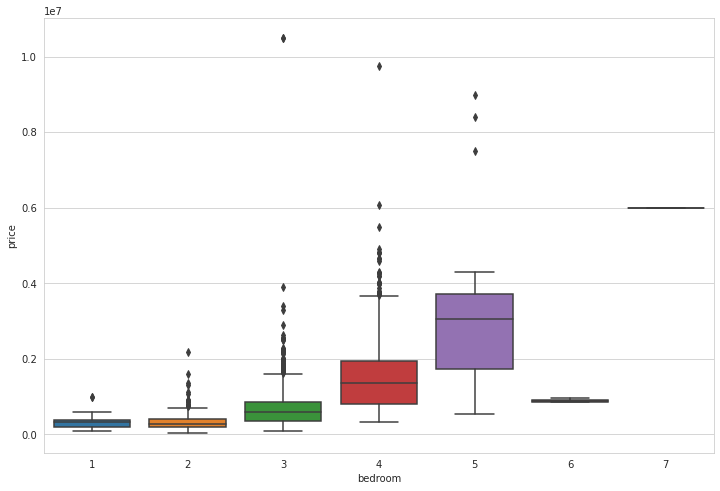

In [47]:
boxplot(data, "bedroom", "price", figsize = (12, 8))

Note the exponential behaviour. If I do a log transformation over price, probably the we will have a linear trend. Let's try:

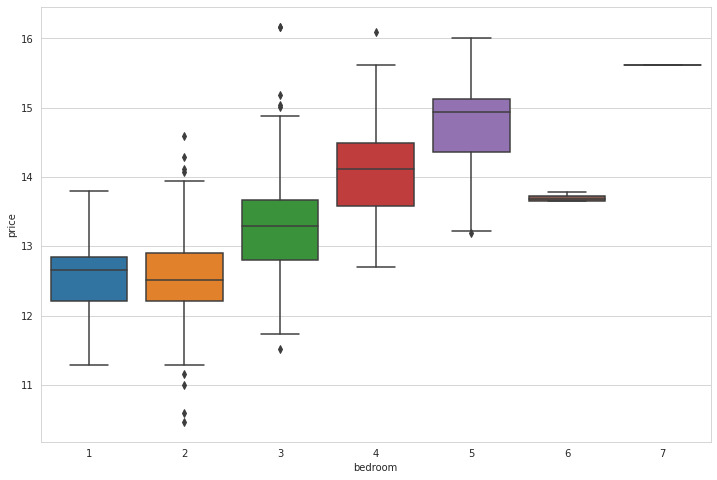

In [48]:
temp_data = data.copy()
temp_data.price = np.log(temp_data.price)
boxplot(temp_data, "bedroom", "price", figsize = (12, 8))

It's not linear at all, mainly because of the prices of the apartments with number of bedrooms greater than 5. Let's see how many apartments have 6 or more bedrooms:

In [49]:
(data.bedroom >= 6).sum()

5

We can see that's not a lot of points... So I will drop these rows, because they are escaping the general trend and can influence our regression model. Then let's plot the boxplot again:

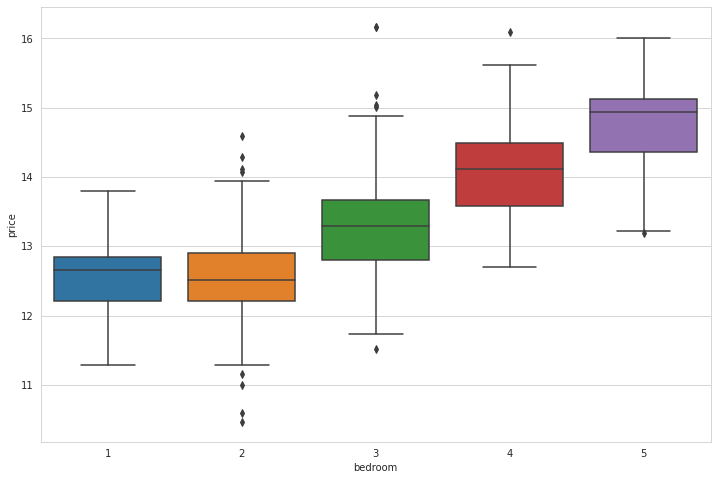

In [50]:
data = data[data.bedroom < 6].reset_index(drop = True)

temp_data = data.copy()
temp_data.price = np.log(temp_data.price)
boxplot(temp_data, "bedroom", "price", figsize = (12, 8))

It's a little better now, except for the beginning of the trend. But I don't think that I can do something about it.

### Price x Bathroom

Again I will use a boxplot:

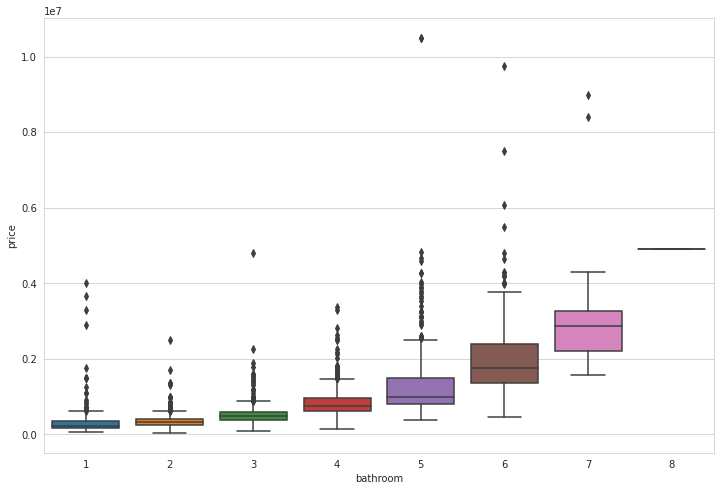

In [51]:
boxplot(data, "bathroom", "price", figsize = (12, 8))

That's a beautiful exponential curve! Once again, a log transformation over price will do the work:

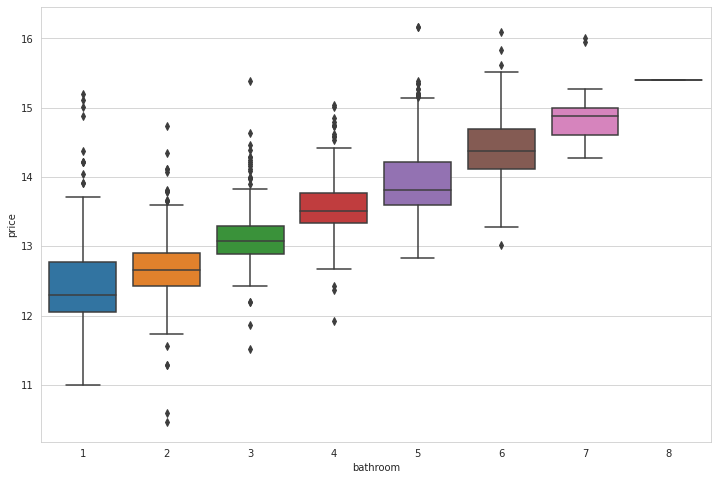

In [52]:
temp_data = data.copy()
temp_data.price = np.log(temp_data.price)
boxplot(temp_data, "bathroom", "price", figsize = (12, 8))

Beautiful!

### Price x Suite

A boxplot is useful here:

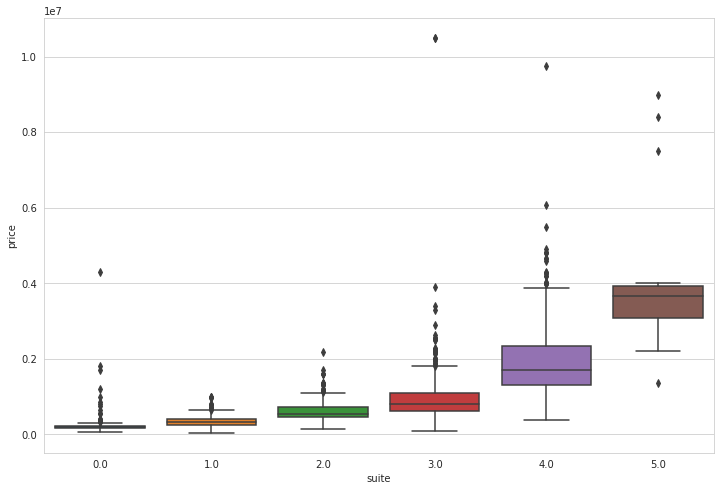

In [53]:
boxplot(data, "suite", "price", figsize = (12, 8))

One more exponential curve... A log transform will do the work again:

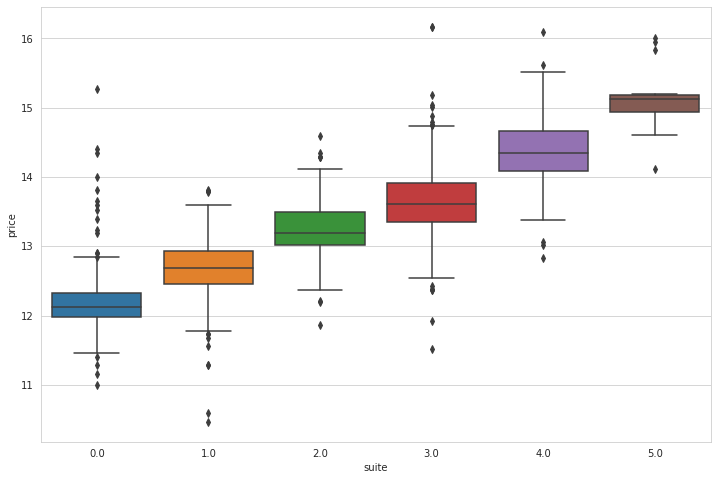

In [54]:
temp_data = data.copy()
temp_data.price = np.log(temp_data.price)
boxplot(temp_data, "suite", "price", figsize = (12, 8))

### Price x Parking

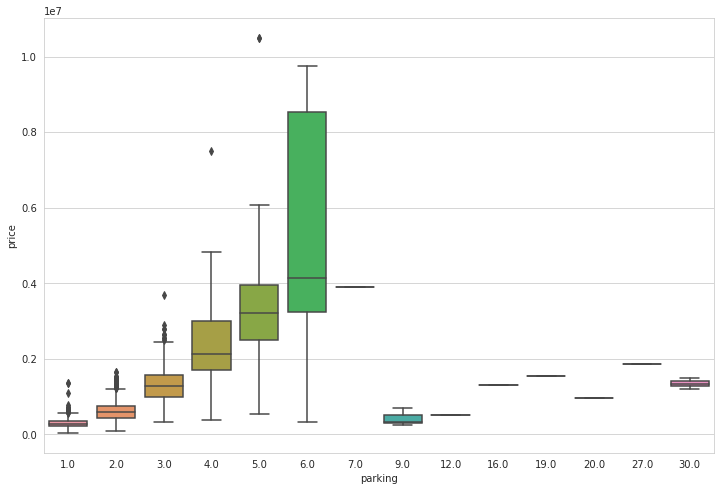

In [55]:
boxplot(data, "parking", "price", figsize = (12, 8))

Wow... Clearly we have an exponential curve in the beginning. Then the pattern is destroyed totally. I will do a log transform and then plot again:

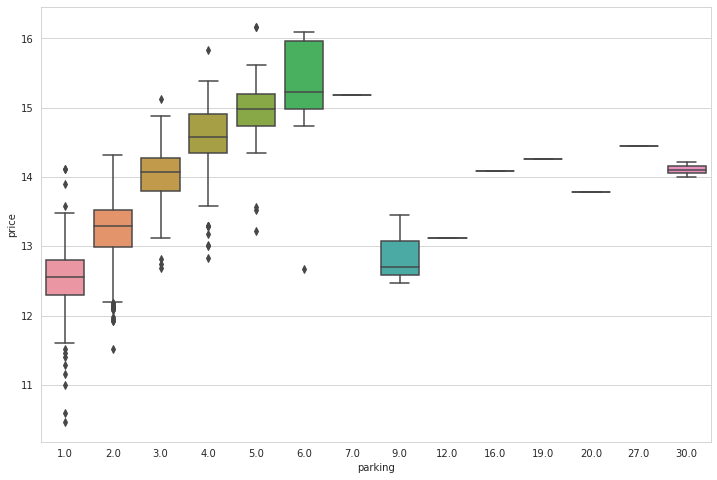

In [56]:
temp_data = data.copy()
temp_data.price = np.log(temp_data.price)
boxplot(temp_data, "parking", "price", figsize = (12, 8))

We have a linear trend, but then for "parking" > 6 the pattern is destroyed. How many apartments have "parking" >= 6?

In [57]:
(data.parking >= 7).sum()

11

11 apartments. I will drop these rows so the pattern isn't destroyed:

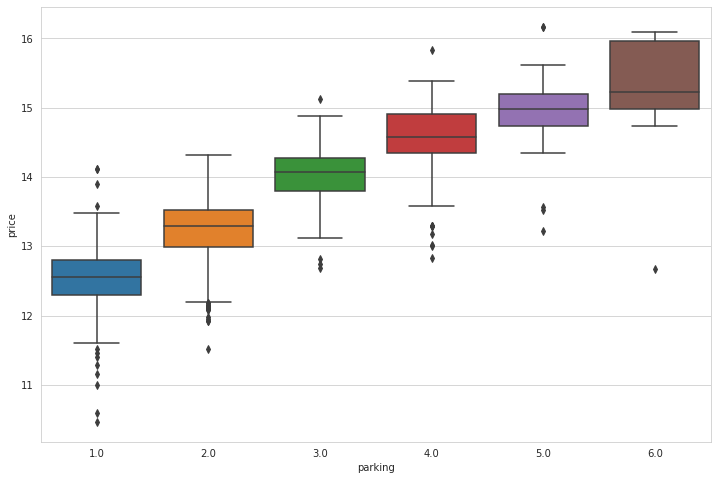

In [58]:
data = data[data.parking < 7].reset_index(drop = True)

temp_data = data.copy()
temp_data.price = np.log(temp_data.price)
boxplot(temp_data, "parking", "price", figsize = (12, 8))

Much better now. It is sufficiently linear.

### Price x Region

A boxplot here will do the work:

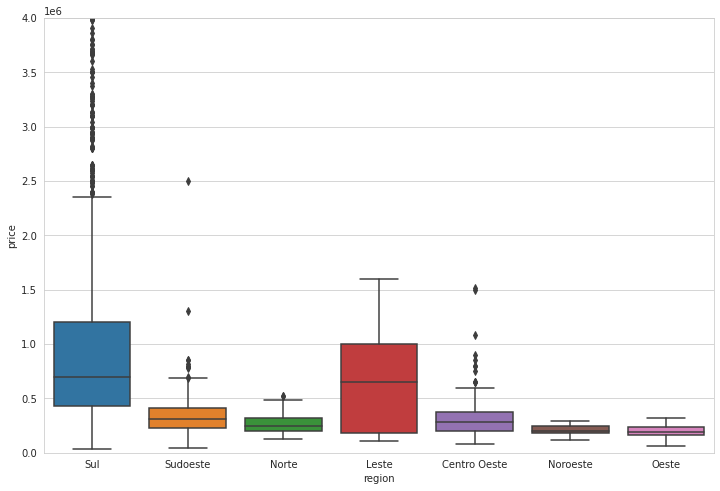

In [59]:
boxplot(data, "region", "price", figsize = (12, 8), ylim = (0, 0.4*10**7))

We have a lot of outlier for region == "Sul". Let's try a log transformation over price:

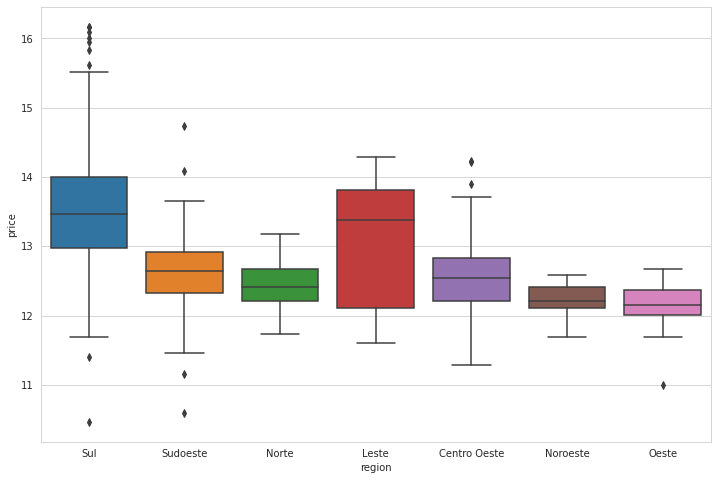

In [60]:
temp_data = data.copy()
temp_data.price = np.log(temp_data.price)
boxplot(temp_data, "region", "price", figsize = (12, 8))

It's better. Note that the boxplots seem to be more symmetric also.

***

# Modelling

In this section, we must have in mind three main steps:

(1) We must prepare the data for modelling (it is, generate dummy variables for categorical variables, for example, and apply all the necessary transformations that we've already discussed);

(2) An optimal number of features must be selected for predicting;

(3) Then a model must be constructed and then evaluated over a test set;


### (1) Preparing data for modelling

I will begin in the first step, obviously. But do you remember that we applied an sqrt transformation over price when we evaluated the behaviour of the price with area? And with all the other features, the transformation used was log. I can't use the two at the same time (at least I don't know how to do it).

So my plan is to go back to the scatter plot involving price and area and choose a transformation with log over price:

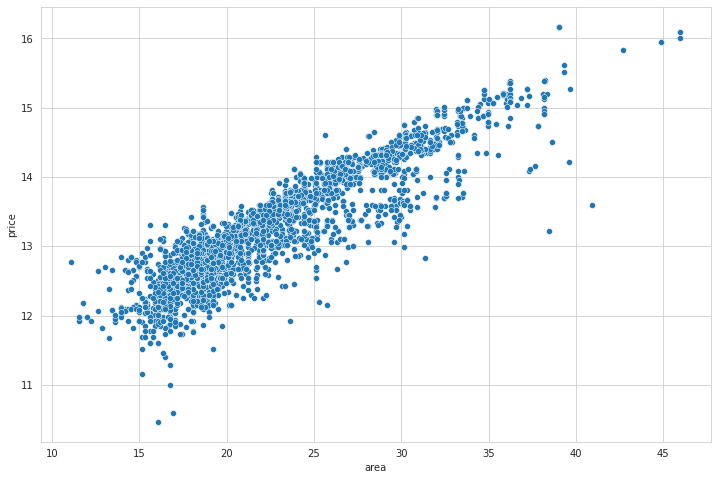

In [61]:
temp_data = data.copy()
temp_data.price = np.log(temp_data.price)
temp_data.area = np.log(temp_data.area)**2
scatterplot(temp_data, "area", "price", (12, 8))

I choose log(price) ~ log(area)², because it appears to have a good linear trend.

Now I will generate dummy variables for the region column. Remember that we must drop one of the categories, so they are not correlated:

In [62]:
data = pd.get_dummies(data, columns = ["region"], drop_first = True)
data.columns

Index(['price', 'address', 'area', 'bedroom', 'bathroom', 'parking',
       'characteristic', 'condominium', 'suite', 'academia',
       ...
       'vista_para_lago', 'área_de_lazer', 'área_de_serviço',
       'árvore_frutífera', 'region_Leste', 'region_Noroeste', 'region_Norte',
       'region_Oeste', 'region_Sudoeste', 'region_Sul'],
      dtype='object', length=178)

Nice. A single column for each region of Goiânia.

There is missing data in some column? Let's check:

In [63]:
cols_total_missing = pd.isna(data).sum()
cols_total_missing[cols_total_missing != 0]

condominium    697
suite            1
dtype: int64

There is a lot of missing data for condominium, but I don't care about it because I will not use it as predicting variable. But I must care about missing values in suite. I think that the most reasonable way to deal with that missing value is to fill it using the median:

In [64]:
values = {"suite": data.suite.median()}
data.fillna(value = values, inplace = True)

In [65]:
# y is the target variable, log transformed
y = np.log(data.price.values)

# X represent the features that will be used for predicting
X = data.drop(columns = ["address", "characteristic", "condominium", "price"]).values

# I need to transform the area column
X[:, 0] = np.log(X[:, 0])**2

# I'm saving the list of names of each feature that will be used for predicting here:
features = list(data.drop(columns = ["address", "characteristic", "condominium", "price"]).columns)

Now I will split the data in train and test sets, so we can evaluate our final linear model:

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 669)

### (2) Selecting an optimal set of features

A good way for selecting optimal features for linear regression is to use Lasso regression, because it will return some coefficients as zero (meaning the importance of the features for predicting).

My plan is to optimize alpha (neg_mean_absolute_error as method of evaluation) using GridSearchCV and then see which features has non-zero coefficients:

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Remember that for Lasso Regression, normalization is necessary!!
lasso = Lasso(normalize = True)

# This is my space of values for alpha
param_grid = {"alpha": np.logspace(-6, 0, 1000)}

gs_lasso = GridSearchCV(lasso, param_grid = param_grid, scoring = "neg_mean_absolute_error")
gs_lasso.fit(X_train, y_train)
print("The best fit had a mean neg_mean_absolute_error = {} and alpha = {}".format(gs_lasso.best_score_,
                                                                            gs_lasso.best_params_["alpha"]))

The best fit had a mean neg_mean_absolute_error = -0.1676016335145462 and alpha = 9.461848194721992e-05


Now let's save the features with non-zero coefficients:

In [68]:
# Saving coefficients to a variable
coefficients = gs_lasso.best_estimator_.coef_

# Taking features that has non-zero coefficients
best_features_idx = coefficients != 0

We can se the name of these features using the function compress from module itertools:

In [69]:
from itertools import compress

list(compress(features, best_features_idx))

['area',
 'bedroom',
 'bathroom',
 'parking',
 'suite',
 'academia',
 'aceita_animais',
 'andar_inteiro',
 'aquecimento',
 'ar_condicionado',
 'armário_na_cozinha',
 'banheira',
 'bar',
 'bicicletário',
 'brinquedoteca',
 'campo_de_futebol',
 'carpete',
 'casa_de_fundo',
 'churrasqueira',
 'churrasqueira_na_varanda',
 'cinema',
 'circuito_de_segurança',
 'condomínio_fechado',
 'conexão_à_internet',
 'coworking',
 'cozinha_americana',
 'cozinha_grande',
 'câmera_de_segurança',
 'dependência_de_empregados',
 'despensa',
 'elevador',
 'escada',
 'espaço_verde_parque',
 'fogão',
 'freezer',
 'garagem',
 'gerador_elétrico',
 'gás_encanado',
 'isolamento_térmico',
 'lareira',
 'mezanino',
 'minha_casa_minha_vida',
 'mobiliado',
 'piscina',
 'piscina_privativa',
 'piso_frio',
 'pista_de_cooper',
 'playground',
 'pé_direito_alto',
 'quadra_poliesportiva',
 'quarto_de_serviço',
 'rede_de_água_e_esgoto',
 'rua_asfaltada',
 'sala_de_jantar',
 'sala_de_reunião',
 'salão_de_convenção',
 'salão_de_f

We can also see which features had greater absolute values for the coefficients. For this purpose, I will plot an bar plot showing the 15 greater absolute coefficients:

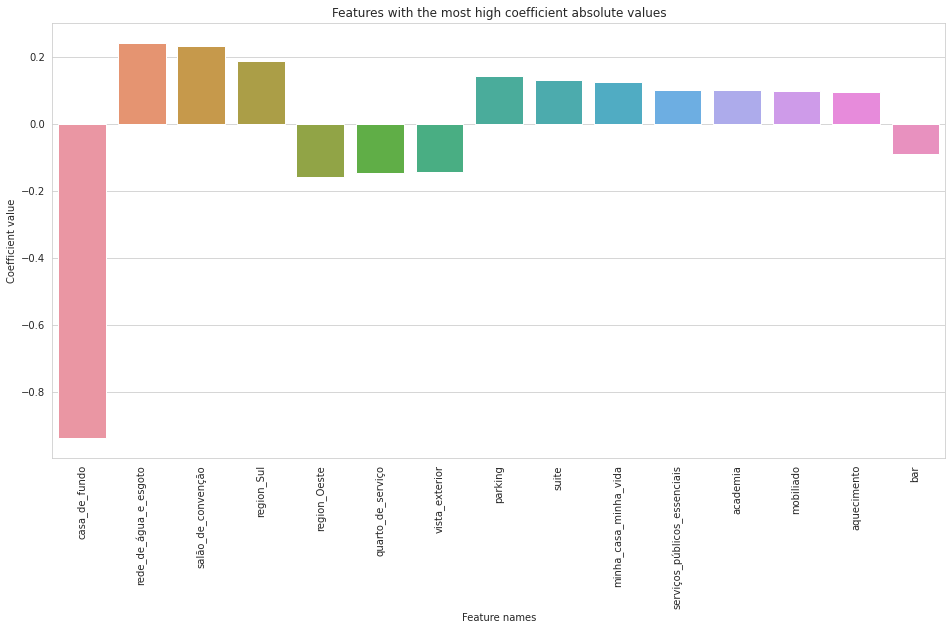

In [70]:
# Sort coefficients and take indexes
sorted_index = np.argsort(np.abs(coefficients))[::-1]

# Sort features based on the indexes above
sorted_features = [features[index] for index in sorted_index]

fig, ax = plt.subplots(figsize = (16,8))

ax.set_title("Features with the most high coefficient absolute values")
ax.set_xlabel("Feature names")
ax.set_ylabel("Coefficient value")

sns.barplot(x = sorted_features[:15], y = coefficients[sorted_index][:15], ax = ax)
ax.tick_params(axis = 'x', rotation = 90)

This bar plot is interesting because it shows the effect of each feature on the log(price) of the apartments. For example, for region Sul of Goiânia, log(price) tends to increase; the opposite is true if the apartment is "casa_de_fundo".

Now we can generate another model, called Ridge Regression (that I think that maybe will perform better given the optimal space of features that we found):

In [71]:
from sklearn.linear_model import Ridge

ridge = Ridge(normalize = True)
param_grid = {"alpha": np.logspace(-6, 0, 1000)}
gs_ridge = GridSearchCV(ridge, param_grid = param_grid, scoring = "neg_mean_absolute_error")

gs_ridge.fit(X_train[:, best_features_idx], y_train)
print("The best fit had a mean neg_mean_absolute_error = {} and alpha = {}".format(gs_ridge.best_score_,
                                                                            gs_ridge.best_params_["alpha"]))

The best fit had a mean neg_mean_absolute_error = -0.16572197567534838 and alpha = 1e-06


I tried a space of values for alpha ranging from 10^(-6) to 1, and the best value for alpha was 10^(-6). What it suggests? That maybe the best model to use here is the simplest linear model, without regularization. Let's see if it's true:

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Linear Regression doesn't need normalization of the features
linear_reg = LinearRegression()

scores = cross_val_score(linear_reg, X_train[:, best_features_idx], y_train, scoring = "neg_mean_absolute_error",
                         cv = 5)

print("Linear Regression had a mean neg_mean_absolute_error = {}".format(np.mean(scores)))

Linear Regression had a mean neg_mean_absolute_error = -0.16572192126634358


Note that the difference in mean neg_mean_absolute_error between Ridge and Linear Regression is minimal. So I will opt for the simplest model, of course.

Let's see the performance of Linear Regression over X_test:

In [73]:
from sklearn.metrics import mean_absolute_error

linear_reg.fit(X_train[:, best_features_idx], y_train)
y_pred = linear_reg.predict(X_test[:, best_features_idx])

print("The mean_absolute_error for test data is: {}".format(mean_absolute_error(y_test, y_pred)))

The mean_absolute_error for test data is: 0.1716747325538044


The mean_absolute_error is quite good, given that the model is predicting over data that it never saw before. But what this result means exactly? If we remember that our model is predicting log(price), and the mean_absolute_error is equal to ~ 0.17, then, when we return to "price" (instead of log(price)), the mean_absolute_error will increase as price increases.

Let me plot something to show how the mean_absolute_error of our model behaves:

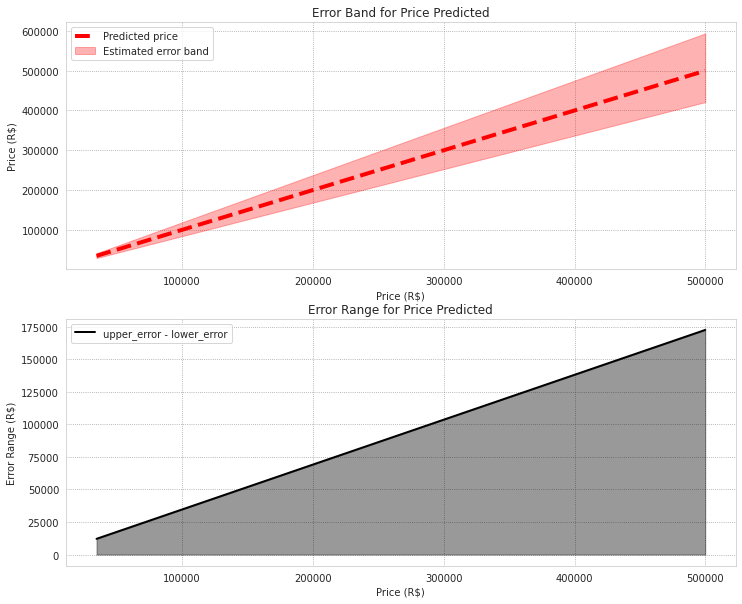

In [74]:
log_price_space = np.linspace(y.min(), 13.122, 500) # log(price)

price_space = np.exp(log_price_space) # exp(log(price)) = price
error_upper = np.exp(log_price_space + mean_absolute_error(y_test, y_pred)) # exp(log(price) + error)
error_lower = np.exp(log_price_space - mean_absolute_error(y_test, y_pred)) # exp(log(price) - error)

# plotting
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
fig, ax = plt.subplots(2, 1, figsize = (12, 10))

# error band
ax[0].plot(price_space, price_space, "--r", linewidth = 4, label = "Predicted price")
ax[0].fill_between(price_space, error_upper, error_lower, alpha = 0.3, color = "red", label = "Estimated error band")
ax[0].set_ylabel("Price (R$)")
ax[0].set_xlabel("Price (R$)")
ax[0].set_title("Error Band for Price Predicted")
ax[0].legend(loc = "upper left")

# error range
ax[1].plot(price_space, error_upper - error_lower, "k", linewidth = 2, label = "upper_error - lower_error")
ax[1].fill_between(price_space, error_upper - error_lower, alpha = 0.4,
                   color = "k")
ax[1].set_xlabel("Price (R$)")
ax[1].set_ylabel("Error Range (R$)")
ax[1].set_title("Error Range for Price Predicted")
ax[1].legend(loc = "upper left")
plt.show()

Note that as the price increases, the error range increases. This occurs because we did a log transform over price.

Now let's evaluate how the residuals of our linear model behaves over X_test. For that, I will use a function available on the internet (source: https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0):

In [75]:
# I changed just some things
def linearity_test(y_pred, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * y_pred - predicted values
    * y - observed values
    
    '''
    
    resids = y - y_pred

    fig, ax = plt.subplots(1,2, figsize = (12, 8))
    
    sns.regplot(x=y_pred, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=y_pred, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

Using the function, we have:

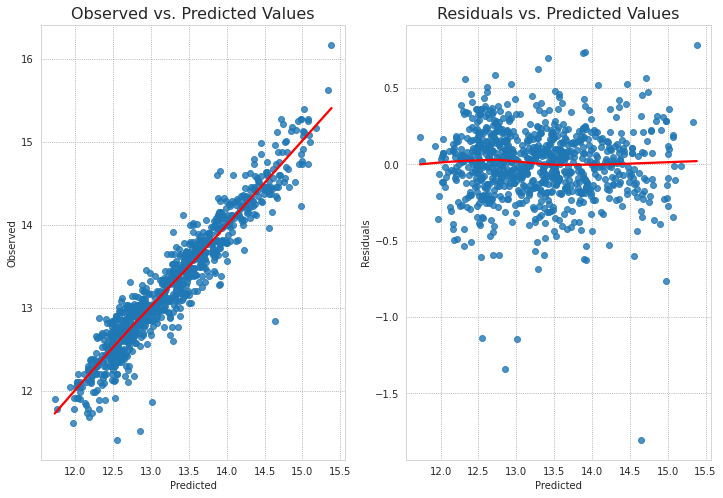

In [76]:
linearity_test(y_pred, y_test)    

The first plot (on the left) shows what were the observed and predicted values (the ideal case is the identity function, it is: observed = predicted), and the last plot shows how the residuals (y_true - y_pred) are distributed.

In the first plot, everything is okay. There is some outliers, but our linear model wouldn't be perfect anyway. Almost all the points are around the red line.

In the second plot, eveything is okay also. The residuals seems to be homoscedastic (variance doesn't vary drastically over the predictions). This means that we can expect more or less an homogeneous error over log(price). Once again, there is some outliers: a residual with a value ~ -1.8 in the log space is quite annoying, because when we apply an exponential transformation over it, it can become a monster. But the big picture is satisfying.

Obs: I'm not a statistician. This means that what I did or said can be wrong, or at least not 100% correct. I tried my best.

Now I will train the linear model with all the data that we have, and then download it, because I will deploy the model in streamlit. The webapp will be in portuguese, because I think it makes more sense, as the apartments are from Goiânia.

In [77]:
import joblib as jb

final_model = LinearRegression().fit(X[:, best_features_idx], y)

jb.dump(final_model, "final_model.pkl")
jb.dump(features, "features_name.pkl")
jb.dump(best_features_idx, "best_features_idx.pkl")
jb.dump(X[:, best_features_idx], "X.pkl")
jb.dump(y, "y.pkl")

print("THE END :)")

THE END :)
